In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.2.4
numpy   version: 1.20.1
seaborn version: 0.11.1


In [3]:
#url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
#url='C:\AppServ\www\ML\Poom_new.csv.csv'
url='C:\AppServ\www\ML\lasted.csv'

df=pd.read_csv(url)
df.head()

,code_id,mapping_code,area_id,survey_name,survey_date,survey_start_time,survey_end_time,gender,birthday,age,...,rice_water,rice_dig,rice_keep,rice_motor,rice_sale,rice_drive,rice_motorcise,rice_mobile,rice_6hrm,rice_sum
0,1,01-0005,1,�����ѡ�� �ɹ���,4/1/2021,12,12.45,1,9/8/1946,74,...,0,0,0,0,0,0,0,0,0,0
1,3,01-0018,1,�����ѡ�� �ɹ���,4/19/2021,10,10.35,0,9/5/1953,67,...,0,0,0,0,0,0,0,0,0,0
2,4,01-0021,1,����� �ح���ͧ,4/17/2021,11,12,1,1/19/1958,63,...,0,0,0,0,0,0,0,0,0,0
3,5,01-0024,1,����� �ح���ͧ,4/17/2021,13,13.45,1,10/9/1959,61,...,0,0,0,0,0,0,0,0,0,0
4,6,01-0040,1,�����ѡ�� �ɹ���,4/19/2021,14,14.35,1,3/5/1950,71,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Columns: 258 entries, code_id to rice_sum
dtypes: float64(6), int64(211), object(41)
memory usage: 2.5+ MB


In [5]:
#sns.pairplot(df,
#             kind='reg', 
#             plot_kws={'scatter_kws': {'alpha': 0.4}, 
#                       'line_kws': {'color': 'orange'}},
#             diag_kws={'color': 'green', 'alpha':.2});

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [7]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.24.1


In [8]:
df.columns

Index(['code_id', 'mapping_code', 'area_id', 'survey_name', 'survey_date',
       'survey_start_time', 'survey_end_time', 'gender', 'birthday', 'age',
       ...
       'rice_water', 'rice_dig', 'rice_keep', 'rice_motor', 'rice_sale',
       'rice_drive', 'rice_motorcise', 'rice_mobile', 'rice_6hrm', 'rice_sum'],
      dtype='object', length=258)

In [9]:
#model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)

#X=df[[ 'weight', 'height', 'waistline']]
#X=df[[ 'weight', 'height', 'waistline','income_total','expend_avg','expend_health_year','work_week_hr','gender']]		
#X=df[[ 'weight', 'height', 'waistline','income_total','expend_avg','age','age_range','work_daytime','work_night','can_run','can_arm','can_shrink','can_see','machine_walk']]		
X=df[[
'area_id',
'gender',
'age',
'age_range',
'weight',
'height',
'waistline',
'member_total',
'member_earn_money',
'member_takecare',
'education',
'marital_status',
'residential',
'house_live',
'house_belong',
'bedroom',
'income_total',
'expend_avg',
'expend_health_year',
'income_enough',
'career_flag',
'income_main_total',
'income_amt',
'income_detail',
'work_week_hr',
'distant_km',
'distant_m',
'duration_hr',
'duration_min',
'work_place',
'accident',
'need_job',
'need_job_hr',
'wages_flag',
'wages_expect',
'expect_job_hr',
'expect_wages_hr_type',
'expect_wages_hr',
'can_work',
'can_travel_self',
'work_daytime',
'work_night',
'can_run',
'can_arm',
'can_shrink',
'can_see',
'sts_sleep',
'sts_concentration',
'sts_edgy',
'sts_bored',
'sts_introvert',
'sum_sts',
'sts_group',
'fall_times',
'machine_walk',
'sum_tmse',
'tmse_group',
'pain_neck',
'pain_shoulder',
'pain_scapula',
'pain_elbow',
'pain_hand',
'pain_back',
'pain_hip',
'pain_knee',
'pain_foot',
'health_neck',
'health_back',
'health_muscle',
'health_move',
'health_sit',
'health_stand',
'health_bow',
'health_squatting',
'health_kneel',
'health_heavy',
'health_lifting',
'health_catch',
'health_think',
'health_hearing',
'health_hand',
'health_skin']]
#'work_skill',
#'work_body',
#'work_think',
#'work_effect',
#'work_leave',
#'work_2yrs',
#'feel_fun',
#'feel_active',
#'feel_hope',
#'disease']]   

#X=df[['disease_detail_1','disease_detail_2','disease_detail_3','disease_detail_4','disease_detail_5','disease_detail_6','disease_detail_7','disease_detail_8','disease_detail_9','disease_detail_10','disease_detail_11','pain_neck','pain_shoulder','pain_scapula','pain_elbow','pain_hand','pain_back','pain_hip','pain_knee','pain_foot']]

#X=df[['pain_neck','pain_shoulder','pain_scapula','pain_elbow','pain_hand','pain_back','pain_hip','pain_knee','pain_foot']]

#X=df[['income_total','income_source_score','expend_avg','expend_health_year','income_enough','career_flag','income_main_total','work_week_hr','accident','need_job','need_job_hr','wages_flag','wages_expect']]

X=df[['income_total','expend_avg','income_main_total','expend_health_year','work_week_hr','pain_back','pain_knee','pain_hip','pain_neck','pain_shoulder','disease_detail_1','disease_detail_2','disease_detail_3','disease_detail_4','disease_detail_5','disease_detail_6','disease_detail_7','disease_detail_8','disease_detail_9','disease_detail_10','disease_detail_11','pain_neck','pain_shoulder','pain_scapula','pain_elbow','pain_hand','pain_back','pain_hip','pain_knee','pain_foot']]

y=df['section4_group']
#X=df[[ 'weight']]		
#y=df['sectio4_score']
#y=df['gender']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [10]:
model.feature_importances_

array([0.16171004, 0.14084835, 0.11666515, 0.0730703 , 0.08999532,
       0.049479  , 0.04997473, 0.03779612, 0.03653052, 0.03705405,
       0.04891524, 0.04652643, 0.03710189, 0.03755398, 0.03677887])

In [11]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

pain_neck             0.036531
pain_shoulder         0.036779
pain_shoulder         0.037054
pain_hip              0.037102
pain_neck             0.037554
pain_hip              0.037796
pain_knee             0.046526
pain_back             0.048915
pain_back             0.049479
pain_knee             0.049975
expend_health_year    0.073070
work_week_hr          0.089995
income_main_total     0.116665
expend_avg            0.140848
income_total          0.161710
dtype: float64

In [12]:
fs.sum()

1.0

<AxesSubplot:>

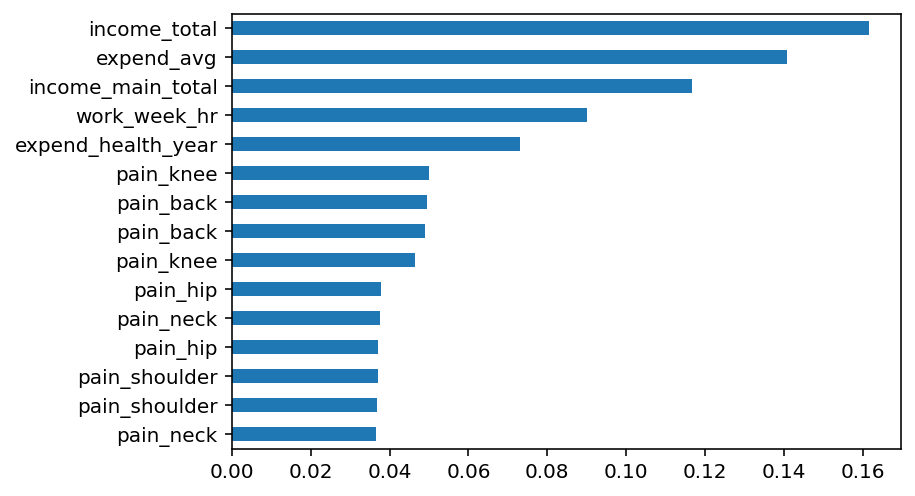

In [13]:
fs.plot(kind='barh')

In [14]:
fs[fs > .1]

income_main_total    0.116665
expend_avg           0.140848
income_total         0.161710
dtype: float64

In [15]:
fs.nlargest(50) #.index

income_total          0.161710
expend_avg            0.140848
income_main_total     0.116665
work_week_hr          0.089995
expend_health_year    0.073070
pain_knee             0.049975
pain_back             0.049479
pain_back             0.048915
pain_knee             0.046526
pain_hip              0.037796
pain_neck             0.037554
pain_hip              0.037102
pain_shoulder         0.037054
pain_shoulder         0.036779
pain_neck             0.036531
dtype: float64

In [16]:
fs[fs > .1].index

Index(['income_main_total', 'expend_avg', 'income_total'], dtype='object')

In [17]:
#X=df[fs[fs > .1].index]
#X.head()

In [18]:
#X=df[['weight', 'height', 'waistline','income_total','expend_avg','expend_health_year','work_week_hr','gender']]
#X=df[['weight', 'height', 'waistline','income_total','expend_avg']]
#X=df[['weight','income_total','expend_avg']]
#X=df[['height','waistline']]
# X=df[fs[fs > .1].index]
#y=df['sectio4_score']
#X=df[['income_total','expend_avg','age','sum_tmse','weight','waistline','income_main_total','height','education','sum_sts']]
#d tree X=df[['income_total','expend_avg','age','sum_tmse','can_run','waistline','pain_knee','height','weight','work_week_hr']]

#X=df[['sum_tmse','waistline','weight','pain_knee','pain_back','can_run','sum_sts','pain_hip','pain_shoulder','pain_neck','pain_scapula','can_travel_self','pain_elbow','sts_concentration','pain_foot','pain_hand','sts_sleep','sts_edgy','sts_bored','can_see']] #HEALTE

#X=df[['income_total','expend_avg','income_main_total','income_amt','work_week_hr','expend_health_year','member_takecare','member_total','member_earn_money','duration_min','distant_km','income_enough','expect_job_hr','house_live','need_job_hr','bedroom']] #INCOME

#X=df[['income_total','expend_avg','sum_tmse','waistline','weight','income_main_total','income_amt','pain_knee','pain_back','can_run','sum_sts','work_week_hr','expend_health_year','member_takecare','member_total','health_heavy','member_earn_money','pain_hip','health_lifting','duration_min','pain_shoulder','pain_neck','distant_km','income_enough','income_detail','expect_job_hr','pain_scapula','can_travel_self','pain_elbow','sts_concentration','house_live','pain_foot','pain_hand','sts_sleep','can_work','sts_edgy','sts_bored','health_think','health_stand','need_job_hr','health_muscle','bedroom','can_see']] #MIX

#X=df[['disease_detail_1','disease_detail_12','disease_detail_5','disease_detail_9','disease_detail_2']]
#y=df['section4_group']

In [19]:
# use stratify to split train/test
#X=df[[ 'mapping_code','height']]
#X=df[['height','waistline']]
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                   # stratify=y,
                                                    random_state=7)

#print(X_train)
#print(X_test)

In [20]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    #[SVC(kernel='linear'), 'SVC_linear'],
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 0.3663
[[29 17 15  1]
 [32 62 50  9]
 [16 47 44  6]
 [ 8 21 15  2]]
              precision    recall  f1-score   support

           1       0.34      0.47      0.39        62
           2       0.42      0.41      0.41       153
           3       0.35      0.39      0.37       113
           4       0.11      0.04      0.06        46

    accuracy                           0.37       374
   macro avg       0.31      0.33      0.31       374
weighted avg       0.35      0.37      0.35       374

----------------------------------------------------------------------------------------------------
C:\Users\somsuksri\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation 

In [21]:
model_scores

[[0.3663101604278075, 'KNeighborsClassifier'],
 [0.4786096256684492, 'LogisticRegression'],
 [0.3716577540106952, 'Perceptron'],
 [0.393048128342246, 'DecisionTreeClassifier'],
 [0.49732620320855614, 'GradientBoostingClassifier'],
 [0.4679144385026738, 'RandomForestClassifier'],
 [0.4411764705882353, 'BaggingClassifier'],
 [0.44919786096256686, 'AdaBoostClassifier'],
 [0.29411764705882354, 'GaussianNB'],
 [0.4411764705882353, 'MLPClassifier'],
 [0.13101604278074866, 'GaussianProcessClassifier']]

In [22]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

,score,classifier
4,0.497326,GradientBoostingClassifier
1,0.478610,LogisticRegression
5,0.467914,RandomForestClassifier
7,0.449198,AdaBoostClassifier
6,0.441176,BaggingClassifier
9,0.441176,MLPClassifier
3,0.393048,DecisionTreeClassifier
2,0.371658,Perceptron
0,0.366310,KNeighborsClassifier
8,0.294118,GaussianNB


In [23]:

#X=df[['height','weight','waistline']]
X=df[['height','waistline']]
# X=df[fs[fs > .1].index]
y=df['gender']#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
#g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>